# Lab 6

This lab connects all the pieces involved in training feed-forward fully connected neural networks. You will run a full set of experiments to explore different hyperparameters and hidden layer sizes for both the MNIST and FASHION_MNIST datasets, and report your findings.

In [8]:
# Import the libraries we'll use below.
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style

import tensorflow as tf
from tensorflow import keras
from keras import metrics
tf.get_logger().setLevel('INFO')

## Datasets


### Fashion MNIST

We load the fashion_mnist dataset as before.

Label: t-shirt


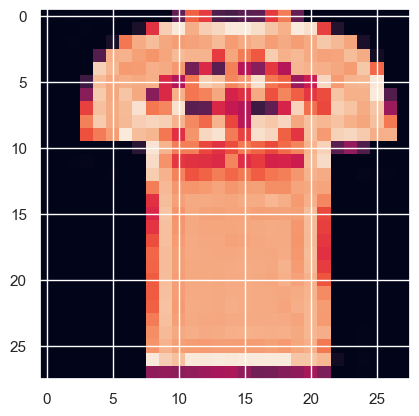

In [10]:
from keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset.
(X_train_fashion, Y_train_fashion), (X_test_fashion, Y_test_fashion) = fashion_mnist.load_data()
X_train_fashion = X_train_fashion / 255.
X_test_fashion = X_test_fashion / 255.

# Flatten Y_train and Y_test, so they become vectors of label values.
Y_train_fashion = Y_train_fashion.flatten()
Y_test_fashion = Y_test_fashion.flatten()

label_names = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
               'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

# Apply random shufflying to training examples.
np.random.seed(0)
indices = np.arange(X_train_fashion.shape[0])
shuffled_indices = np.random.permutation(indices)
X_train_fashion = X_train_fashion[shuffled_indices]
Y_train_fashion = Y_train_fashion[shuffled_indices]

# Show the first training example.
print('Label: %s' %label_names[Y_train_fashion[0]])
plt.imshow(X_train_fashion[0])
plt.show()

In [12]:
X_train_fashion[0]

array([[0.        , 0.        , 0.00392157, 0.        , 0.        ,
        0.00784314, 0.        , 0.        , 0.        , 0.        ,
        0.25490196, 0.67058824, 0.59607843, 0.20784314, 0.18431373,
        0.23137255, 0.24313725, 0.58823529, 0.72941176, 0.25882353,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.00392157, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.0745098 , 0.57254902, 0.9254902 ,
        0.99607843, 0.84313725, 0.9254902 , 0.94901961, 1.        ,
        1.        , 0.96470588, 0.90196078, 0.85098039, 1.        ,
        0.96862745, 0.60392157, 0.09019608, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.00392157, 0.        , 0.        ,
        0.0627451 , 0.71764706, 0.83921569, 0.88235294, 0.82745098,
        0.80392157, 0.81568627, 0.82745098, 0.8745098 , 0.8       ,
        0.83529412, 0.8588

### MNIST

We also load the (digits) mnist dataset in the same way. Note that the number of train/test examples as well as the data shapes are identical to fashion_mnist.

Label: 3


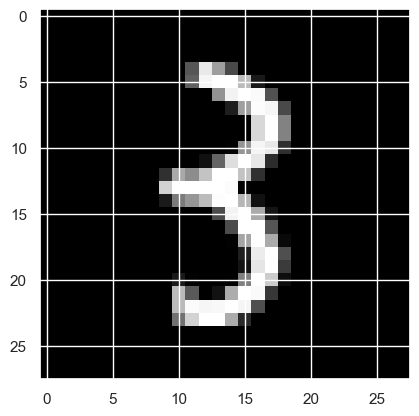

In [3]:
from keras.datasets import mnist

# Load the MNIST dataset.
(X_train_digits, Y_train_digits), (X_test_digits, Y_test_digits) = mnist.load_data()
X_train_digits = X_train_digits / 255
X_test_digits = X_test_digits / 255

# Flatten Y_train and Y_test, so they become vectors of label values.
Y_train_digits = Y_train_digits.flatten()
Y_test_digits = Y_test_digits.flatten()

# Apply random shufflying to training examples.
np.random.seed(0)
indices = np.arange(X_train_digits.shape[0])
shuffled_indices = np.random.permutation(indices)
X_train_digits = X_train_digits[shuffled_indices]
Y_train_digits = Y_train_digits[shuffled_indices]

# Show the first training example.
print('Label: %d' %Y_train_digits[0])
plt.imshow(X_train_digits[0], cmap='gray')
plt.show()

## Build a Model

We will write a build_model function that allows for a range of experiments on both datasets.

---
### Exercise 1 (58points)

Fill in code that implements the build_model function, including all the arguments listed in the function definition.

In [4]:
def build_model(n_classes,
                hidden_layer_sizes=[],
                activation='tanh',
                optimizer=keras.optimizers.SGD,
                learning_rate=0.01):
  """Build a multi-class logistic regression model using Keras.

  Args:
    n_classes: Number of output classes in the dataset.
    hidden_layer_sizes: A list with the number of units in each hidden layer.
    activation: The activation function to use for the hidden layers.
    optimizer: The optimizer to use (SGD, Adam).
    learning_rate: The desired learning rate for the optimizer.

  Returns:
    model: A tf.keras model (graph).
  """
  tf.keras.backend.clear_session()
  np.random.seed(0)
  tf.random.set_seed(0)

  # YOUR CODE HERE
  
  model = tf.keras.Sequential()
  if optimizer == 'SGD': 
    optimizer_func = keras.optimizers.SGD(learning_rate = learning_rate)
  else: 
    optimizer_func = keras.optimizers.Adam(learning_rate = learning_rate)
  model.add(keras.layers.Flatten(name = 'Input'))
  for hidden_layer in hidden_layer_sizes: 
        model.add(keras.layers.Dense(units = hidden_layer, 
                                       activation = activation))
  model.add(keras.layers.Dense(units = n_classes, activation = 'softmax', name = 'Output'))
  model.compile(loss = 'sparse_categorical_crossentropy',
                optimizer = optimizer_func, 
                metrics = ['accuracy'])

  return model

## Run Experiments

We can now run a suite of experiments to see how the hyperparameters and layer sizes effect performance. The train_and_evaluate function below can be used to run experiments and retrieve results.

Training...


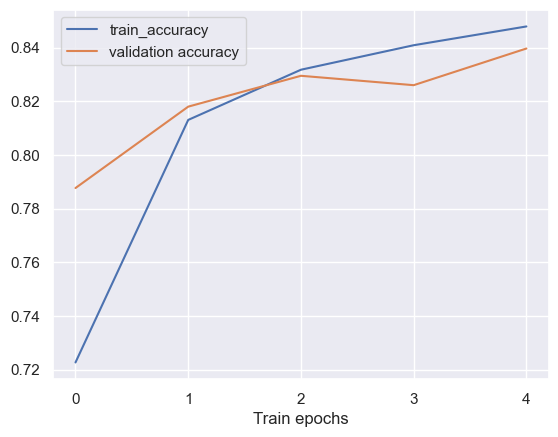

Test Accuracy: 0.8363
Number of Parameters is : 235146.0000


In [5]:
def train_and_evaluate(data='fashion',
                       hidden_layer_sizes=[256,128],
                       activation='relu',
                       optimizer='SGD',
                       learning_rate=0.01,
                       num_epochs=5):

  # Build the model.
  model = build_model(n_classes=10,
                      hidden_layer_sizes=hidden_layer_sizes,
                      activation=activation,
                      optimizer=optimizer,
                      learning_rate=learning_rate)

  # Select the dataset.
  if data == 'digits':
    X_train = X_train_digits
    X_test = X_test_digits
    Y_train = Y_train_digits
    Y_test = Y_test_digits
  elif data == 'fashion':
    X_train = X_train_fashion
    X_test = X_test_fashion
    Y_train = Y_train_fashion
    Y_test = Y_test_fashion
  else:
    raise 'Unsupported dataset: %s' %data

  # Train the model.
  print('Training...')
  history = model.fit(
    x=X_train,
    y=Y_train,
    epochs=num_epochs,
    batch_size=64,
    validation_split=0.1,
    verbose=0)

  # Retrieve the training metrics (after each train epoch) and the final test
  # accuracy.
  train_accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  plt.plot(train_accuracy, label='train_accuracy')
  plt.plot(val_accuracy, label='validation accuracy')
  plt.xticks(range(num_epochs))
  plt.xlabel('Train epochs')
  plt.legend()
  plt.show()

  test_accuracy = model.evaluate(x=X_test, y=Y_test, verbose=0,
                                 return_dict=True)['accuracy']
  model_param = model.count_params()
  return test_accuracy,model_param

model_acc, model_param = train_and_evaluate()
print('Test Accuracy: %1.4f' %model_acc)
print('Number of Parameters is : %1.4f' %model_param)

In [6]:
df = pd.DataFrame(
    {
        'DATA': np.repeat(['digits', 'fashion'],5),
        'HIDDEN SIZES':[[], [], [], [128], [256,128]] * 2,
        'ACTIVATION':['tanh', 'relu', 'relu', 'relu', 'relu'] * 2,
        'OPTIMIZER':['SGD', 'SGD', 'Adam', 'Adam', 'Adam'] * 2,
        'LEARNING RATE': np.repeat(0.01, 10)
    })
df

,DATA,HIDDEN SIZES,ACTIVATION,OPTIMIZER,LEARNING RATE
0,digits,[],tanh,SGD,0.01
1,digits,[],relu,SGD,0.01
2,digits,[],relu,Adam,0.01
3,digits,[128],relu,Adam,0.01
4,digits,"[256, 128]",relu,Adam,0.01
5,fashion,[],tanh,SGD,0.01
6,fashion,[],relu,SGD,0.01
7,fashion,[],relu,Adam,0.01
8,fashion,[128],relu,Adam,0.01
9,fashion,"[256, 128]",relu,Adam,0.01


Training...


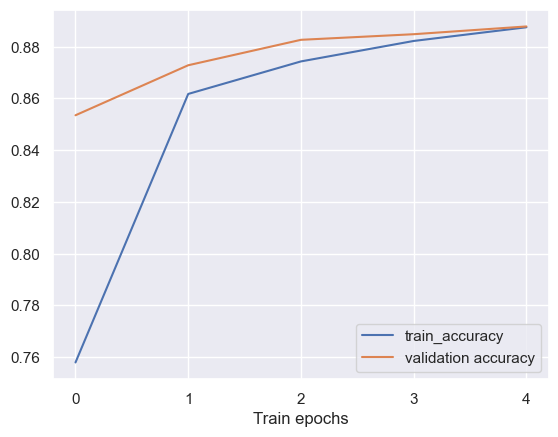

Test Accuracy: 0.8987
Number of Parameters is : 7850.0000
Training...


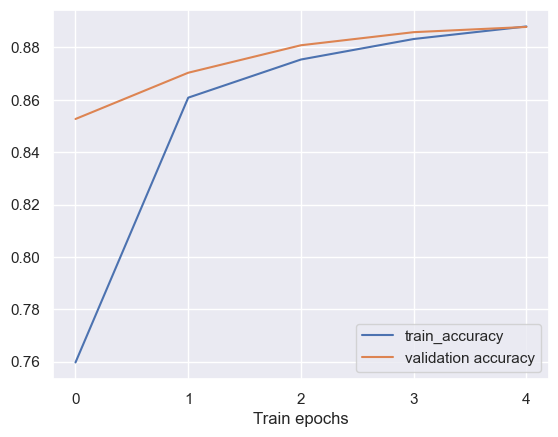

Test Accuracy: 0.8977
Number of Parameters is : 7850.0000
Training...


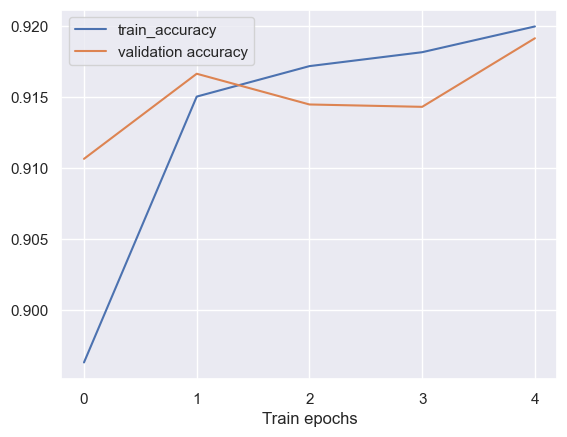

Test Accuracy: 0.9208
Number of Parameters is : 7850.0000
Training...


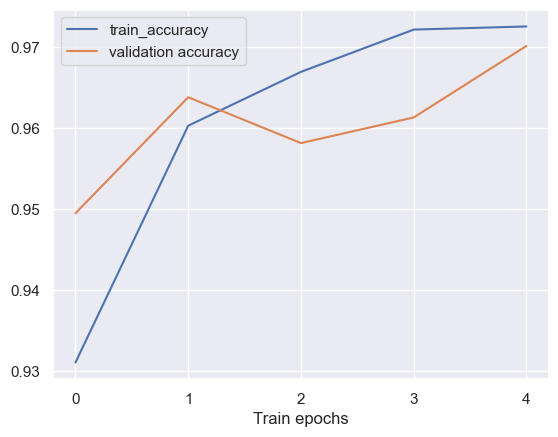

Test Accuracy: 0.9663
Number of Parameters is : 101770.0000
Training...


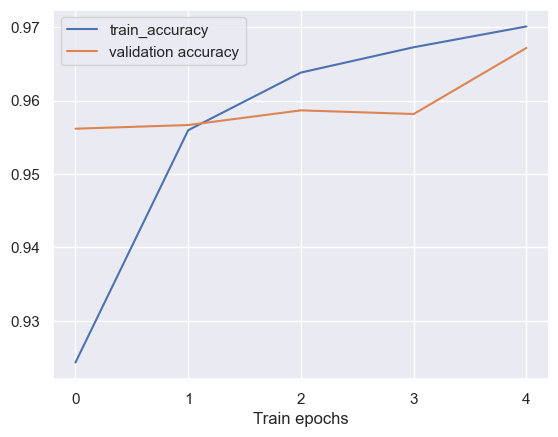

Test Accuracy: 0.9658
Number of Parameters is : 235146.0000
Training...


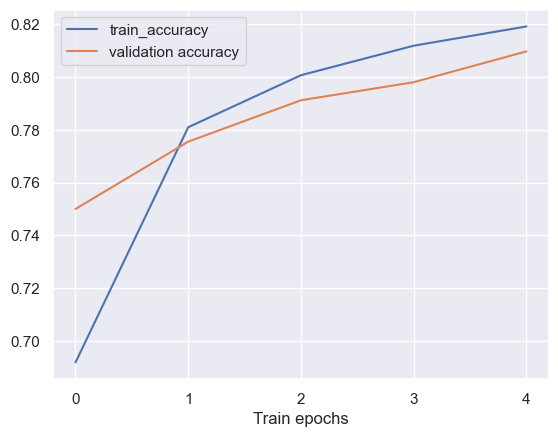

Test Accuracy: 0.8081
Number of Parameters is : 7850.0000
Training...


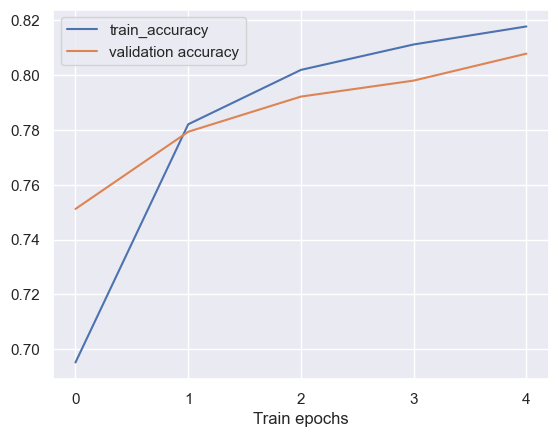

Test Accuracy: 0.8055
Number of Parameters is : 7850.0000
Training...


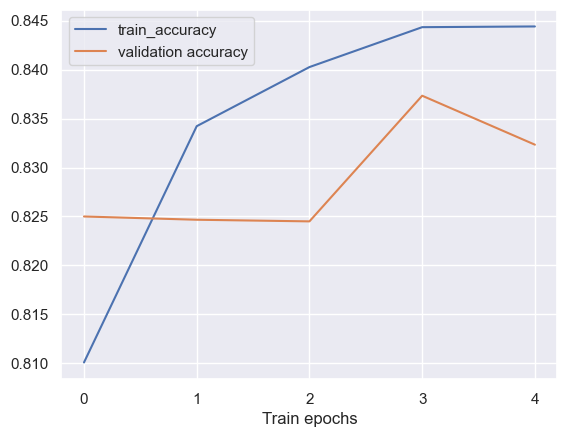

Test Accuracy: 0.8359
Number of Parameters is : 7850.0000
Training...


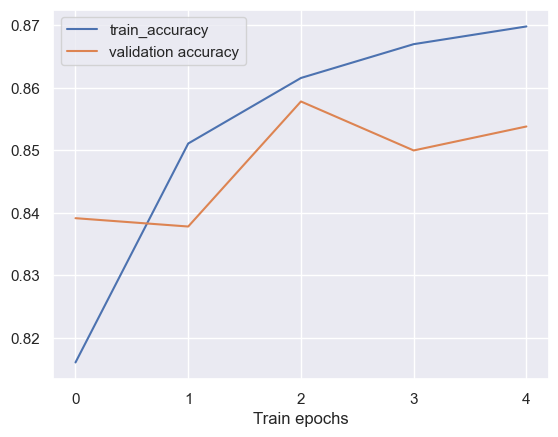

Test Accuracy: 0.8514
Number of Parameters is : 101770.0000
Training...


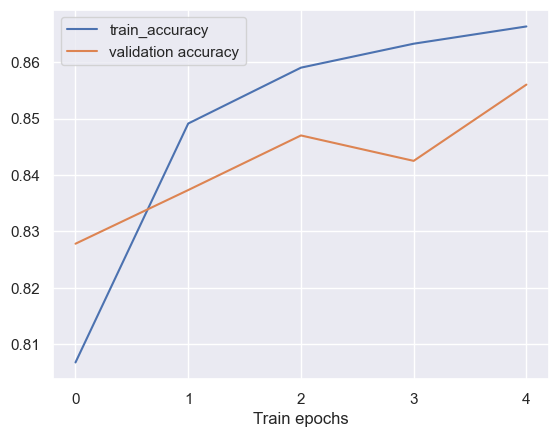

Test Accuracy: 0.8557
Number of Parameters is : 235146.0000


In [7]:
test_accuracy = [] 
test_param = []
for ind in df.index: 
    model_acc, model_param = train_and_evaluate(
        data = df['DATA'][ind],
        hidden_layer_sizes = df['HIDDEN SIZES'][ind],
        activation = df['ACTIVATION'][ind],
        optimizer = df['OPTIMIZER'][ind],
        learning_rate = df['LEARNING RATE'][ind])
    test_accuracy.append(model_acc)
    test_param.append(model_param)
    print('Test Accuracy: %1.4f' %model_acc)
    print('Number of Parameters is : %1.4f' %model_param)

In [8]:
df['#PARAMETERS'] = test_param
df['TEST ACCURACY'] = test_accuracy
df

,DATA,HIDDEN SIZES,ACTIVATION,OPTIMIZER,LEARNING RATE,#PARAMETERS,TEST ACCURACY
0,digits,[],tanh,SGD,0.01,7850,0.8987
1,digits,[],relu,SGD,0.01,7850,0.8977
2,digits,[],relu,Adam,0.01,7850,0.9208
3,digits,[128],relu,Adam,0.01,101770,0.9663
4,digits,"[256, 128]",relu,Adam,0.01,235146,0.9658
5,fashion,[],tanh,SGD,0.01,7850,0.8081
6,fashion,[],relu,SGD,0.01,7850,0.8055
7,fashion,[],relu,Adam,0.01,7850,0.8359
8,fashion,[128],relu,Adam,0.01,101770,0.8514
9,fashion,"[256, 128]",relu,Adam,0.01,235146,0.8557


---
### Exercise 2 (8 points)

Run experiments and fill in the test results in the table below. Feel free to extend the table to more experiments as you see fit.

#### Student Solution - please refer to the output table above. There is a slight change in accuracy everytime I run the simulation, so I created a dataframe to automatically update the accuracy results whenever a new simulation is run. 

DATA | HIDDEN SIZES | ACTIVATION | OPTIMIZER | LEARNING RATE | #PARAMETERS | TEST ACCURACY
-|-|-|-|-|-|-
digits|[]|tanh|SGD|0.01||
digits|[]|relu|SGD|0.01||
digits|[]|relu|Adam|0.01||
digits|[128]|relu|Adam|0.01||
digits|[256,128]|relu|Adam|0.01||
-
fashion|[]|tanh|SGD|0.01||
fashion|[]|relu|SGD|0.01||
fashion|[]|relu|Adam|0.01||
fashion|[128]|relu|Adam|0.01||
fashion|[256,128]|relu|Adam|0.01||
